In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from drawarrow import ax_arrow
from pyfonts import load_google_font
from highlight_text import fig_text

In [2]:
cranes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-09-30/cranes.csv")

In [3]:
cranes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1548 non-null   object 
 1   observations        1387 non-null   float64
 2   comment             190 non-null    object 
 3   weather_disruption  1548 non-null   bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 37.9+ KB


In [4]:
cranes

,date,observations,comment,weather_disruption
0,2024-10-03,408.0,Last count of season,False
1,2024-09-30,14940.0,NaN,False
2,2024-09-26,NaN,Canceled/No count,True
3,2024-09-23,18450.0,NaN,False
4,2024-09-19,14900.0,NaN,False
...,...,...,...,...
1543,1994-03-28,NaN,Canceled/No count,False
1544,1994-03-27,NaN,Canceled/No count,False
1545,1994-03-26,NaN,Canceled/No count,False
1546,1994-03-25,200.0,NaN,False


In [5]:
# Extract year and month
cranes["date"] = pd.to_datetime(cranes["date"])
cranes["year"] = cranes["date"].dt.year
cranes["month"] = cranes["date"].dt.month

In [6]:
cranes["month"].value_counts(dropna=False)

month
4     714
3     482
9     190
10     84
8      78
Name: count, dtype: int64

In [7]:
# Function to assign season based on month
def assign_season(months):
    seasons = []
    for month in months:
        if month in [8, 9, 10]:
            seasons.append("autumn")
        else:
            seasons.append("spring")        
    return pd.Series(seasons)

cranes["season"] = assign_season(cranes["month"])

In [8]:
# Aggregate observations by year and season 
cranes = cranes.groupby(["year", "season"]).agg({"observations": ["sum"]}).reset_index()

In [9]:
cranes.head(2)

,year,season,observations
,,,sum
0,1994,spring,76992.0
1,1995,spring,84152.0


In [10]:
# Reshape the data
cranes = cranes.pivot(index="year", columns="season", values=["observations"])
cranes.head(2)

observations         
season       autumn   spring
year                        
1994            NaN  76992.0
1995            NaN  84152.0

In [11]:
# Drop years with NaN values
cranes = cranes.dropna().sort_values(by="year", ascending=False)
cranes.columns = ["spring", "autumn"]
cranes = cranes.reset_index()
cranes

,year,spring,autumn
0,2024,94828.0,332388.0
1,2023,201274.0,150896.0
2,2022,102642.0,273980.0
3,2021,93890.0,221636.0
4,2020,129890.0,277097.0
5,2019,103060.0,410188.0
6,2018,88270.0,223162.0
7,2017,111272.0,293277.0
8,2016,86585.0,307305.0
9,2015,103888.0,385075.0


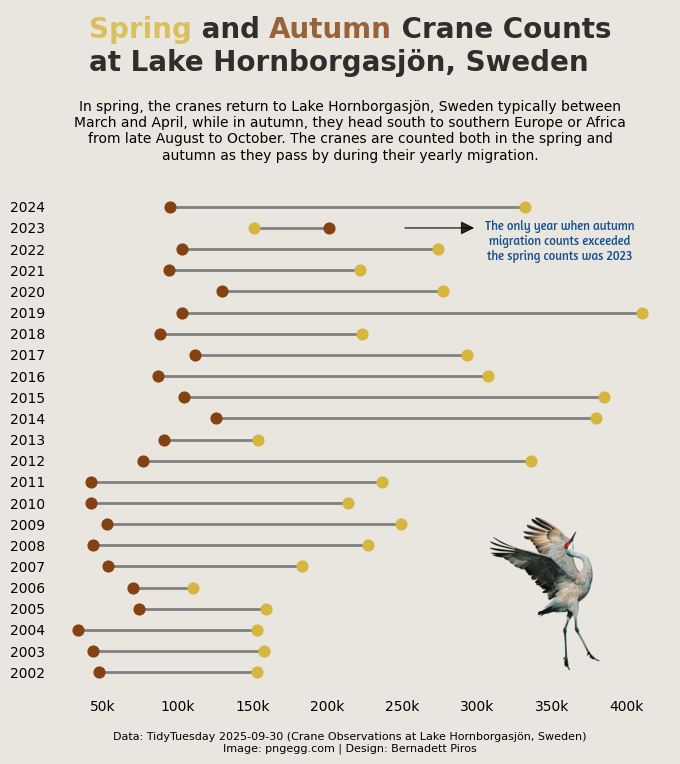

In [12]:
fig, ax = plt.subplots(figsize=(8, 8),facecolor= "#E9E6DF")
# Adjust the spacing 
plt.subplots_adjust(top=0.75)

# Plot lines
for i in range(len(cranes)):
    ax.plot([cranes["autumn"][i], cranes["spring"][i]], [cranes["year"][i], cranes["year"][i]], color="grey", linewidth=2, zorder=1)

# Plot scatters
ax.scatter(cranes["autumn"], cranes["year"], color="#D5B63E", s=60, zorder=2)
ax.scatter(cranes["spring"], cranes["year"], color="#844112", s=60, zorder=2) 

# Remove spines and ticks
ax.spines[["top","right","bottom", "left"]].set_visible(False)
ax.tick_params(length=0)

# Set the locations and labels of xticks
observations = range(50000, 400001, 50000)
ax.set_xticks(observations, labels=[f"{x//1000}k" for x in observations])

# Set the locations and labels of yticks
years = range(2002, 2025)
ax.set_yticks(years, labels=[str(year) for year in years])

# Draw arrow
ax_arrow(
  tail_position=[250000, 2023],
  head_position=[300000, 2023],
  color="black",
  width=1,  
  alpha=0.8,
  ax=ax,
)

font = load_google_font("Amaranth")

# Annotation
ax.text(355000, 2021.5, "The only year when autumn\nmigration counts exceeded\nthe spring counts was 2023",
        size=9, font=font, color="#154F8E", ha="center")

# Set the facecolor of the ax
ax.set_facecolor("#E9E6DF")

# Add a child inset axes to the existing ax
img_crane = mpimg.imread("crane.png") 
child_ax = ax.inset_axes([0.6, 0.05, 0.4, 0.3])
child_ax.imshow(img_crane)
child_ax.axis("off")

# Titles and caption
fig_text(0.5, 0.96, s="<Spring> and <Autumn> Crane Counts\nat Lake Hornborgasjön, Sweden",
         size=20, weight="bold", alpha=0.8, ha="center",
         highlight_textprops=[
            {"color": "#D5B63E", "weight": "black"},
            {"color": "#844112", "weight": "extra bold"},                     
            ])
        
fig.text(0.5, 0.78, s="In spring, the cranes return to Lake Hornborgasjön, Sweden typically between\nMarch and April, while in autumn, they head south to southern Europe or Africa\nfrom late August to October. The cranes are counted both in the spring and\nautumn as they pass by during their yearly migration.",
         size=10, ha="center")        

fig.text(0.5, 0.04, "Data: TidyTuesday 2025-09-30 (Crane Observations at Lake Hornborgasjön, Sweden)\nImage: pngegg.com | Design: Bernadett Piros", size=8, ha="center")

plt.show()

#fig.savefig("2025-09-30.png", bbox_inches='tight', pad_inches=0.2)